# Proposed Image enhancement method using <ins>Gaussian-CLAHE</ins>

In [27]:
import cv2
import numpy as np
from IPython.display import display, Image
import matplotlib.pyplot as plt

In [28]:
# Load the glaucoma eye color image
image = cv2.imread('left_eye.jpg')

# Convert the image to grayscale for processing
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [29]:
# Noise Reduction: Apply Gaussian filtering to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply CLAHE independently to each color channel
enhanced_channels = [clahe.apply(image[:, :, i]) for i in range(3)]
enhanced_image = cv2.merge(enhanced_channels)

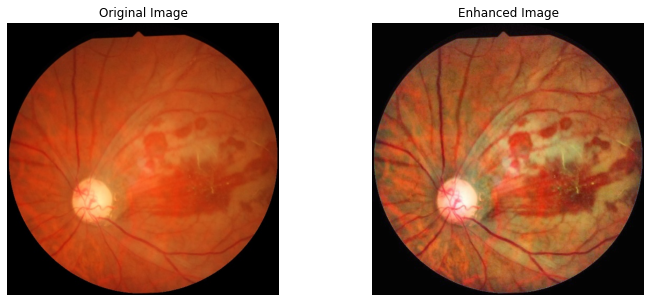

In [30]:
# Display the original and enhanced images in the Jupyter Notebook
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Enhanced Image')
plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Proposed Image Segmentation method with <ins>CDOD-Glaucoma</ins>

#### CDOD-Glaucoma: Color Segmentation with Optic Disc Detection for Glaucoma)

In [31]:
import cv2
import numpy as np
from IPython.display import display, Image
import matplotlib.pyplot as plt


original_image = cv2.imread('left_eye.jpg', cv2.IMREAD_COLOR)
image = cv2.imread('left_eye.jpg', cv2.IMREAD_COLOR)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [32]:
# We will use a circular Hough transform to detect the optic disc.
circles = cv2.HoughCircles(
    gray,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=30,
    param1=100,
    param2=30,
    minRadius=10,
    maxRadius=50
)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # circle around the optic disc in red
        cv2.circle(image, (i[0], i[1]), i[2], (0, 0, 255), 2)

_, binary_vessels = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

# Combine the optic disc and blood vessel segmentation for glucoma detection.
glaucoma_regions = cv2.bitwise_and(image, image, mask=binary_vessels)

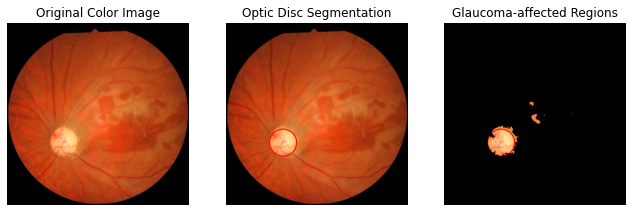

In [33]:
# Display the original color image, segmented optic disc, and detected glaucoma regions
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.title('Original Color Image')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Optic Disc Segmentation')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title('Glaucoma-affected Regions')
plt.imshow(cv2.cvtColor(glaucoma_regions, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()